In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pdf2image
!pip install pytesseract
!pip install nltk
!python -m nltk.downloader all
!apt-get install poppler-utils
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
from nltk import sent_tokenize

#논문 PDF -> image & save

In [ ]:
def pdf_to_text(pdf_file,p):
  # PDF를 이미지로 변환
  pages = convert_from_path(pdf_file, 500)

  # 각 페이지 이미지를 저장
  for i, page in enumerate(pages):
      page.save(f"page_{i+1}.jpg", "JPEG")

  # 이미지에서 텍스트 추출
  text = pytesseract.image_to_string(Image.open("page_"+str(p)+".jpg"))

  # text sentence로 변환
  tokenized_text = sent_tokenize(text)
  return tokenized_text

In [ ]:
sen_text = pdf_to_text('/content/drive/MyDrive/졸업작품/1706.03762.pdf',7)

In [ ]:
for s in sen_text:
  s = s.replace('\n','')
  print()
  print(s)


the input sequence centered around the respective output position.

This would increase the maximumpath length to O(n/r).

We plan to investigate this approach further in future work.

A single convolutional layer with kernel width k < n does not connect all pairs of input and outputpositions.

Doing so requires a stack of O(n/k) convolutional layers in the case of contiguous kernels,or O(log,(n)) in the case of dilated convolutions [18], increasing the length of the longest pathsbetween any two positions in the network.

Convolutional layers are generally more expensive thanrecurrent layers, by a factor of k. Separable convolutions [6], however, decrease the complexityconsiderably, to O(k -n-d+n-d?).

Even with k = n, however, the complexity of a separableconvolution is equal to the combination of a self-attention layer and a point-wise feed-forward layer,the approach we take in our model.

As side benefit, self-attention could yield more interpretable models.

We inspect attention d

# Data 수집

In [ ]:
# 논문 영한 데이터 
import json
import ast
file_path = '/content/drive/MyDrive/졸업작품/data/1.Training/원천데이터/기술과학분야_한영_train_set.json'

with open(file_path, 'r') as file:
    json_data = json.load(file)

In [ ]:
# 대화영 영한 데이터, 15만개
import json
import ast
file_path = '/content/drive/MyDrive/졸업작품/일상생활및구어체_한영_train_set.json'

with open(file_path, 'r') as file:
    json_data = json.load(file)

In [ ]:
len(json_data['data'])

1200000

# Data 병렬 corpus 생성

In [ ]:
json_data

In [ ]:
import pandas as pd
corpus = []

for x in json_data['data']:
  if x['subdomain'] in ['인공지능', '빅데이터','IT']:
    corpus.append([x['en'],x['ko']])

data = pd.DataFrame(corpus)

In [ ]:
len(data)

319551

In [ ]:
import pandas as pd
corpus = []
j,q,k,l = 0,0,0,0
for x in json_data['data']:
  if x['subdomain'] in ['여행']:
    if j == 20000:
      continue
    corpus.append([x['en'],x['ko']])
    j += 1
  if x['subdomain'] in ['음식']:
    if q == 20000:
      continue
    corpus.append([x['en'],x['ko']])
    q += 1
  if x['subdomain'] in ['구매']:
    if k == 20000:
      continue
    corpus.append([x['en'],x['ko']])
    k += 1
  if x['subdomain'] in ['예약']:
    if l == 20000:
      continue
    corpus.append([x['en'],x['ko']])
    l += 1
data = pd.DataFrame(corpus)

In [ ]:
data.head()
# print(len(data))

,0,1
0,You know what the funniest picture is.,형님 제일 웃긴 그림이 뭔지 알아요.
1,>Underwear?,>속옷을?
2,>We're having a get-together.,>회식하거든.
3,"Yes, the is big data is big.",예 이게 빅데이터 빅이네요.
4,>Let me show you this.,>제가 이걸 보여드리겠습니다.


In [ ]:
len(data)

80000

In [ ]:
data[:50000].to_csv('/content/drive/MyDrive/pytorch-transformer-main/data/train_free_talk.csv', index=False)

In [ ]:
data.to_csv('/content/drive/MyDrive/pytorch-transformer-main/data/train_free_2.csv',index=False)

In [ ]:
len_sen = []
for l in [data[[0]].values][0]:
  len_sen.append(len(str(l)))

In [ ]:
len(len_sen)

319551

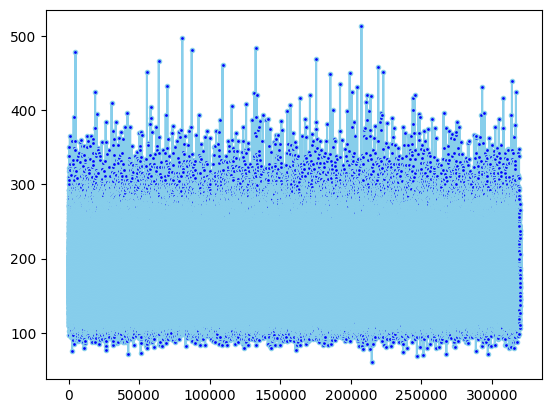

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = [i for i in range(319551)]
plt.plot(x,len_sen,color='skyblue',marker='o',markerfacecolor='blue',markersize=3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f974f444790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f974f444cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f974f4444f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f974f445210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f974f4454b0>],
 'means': []}

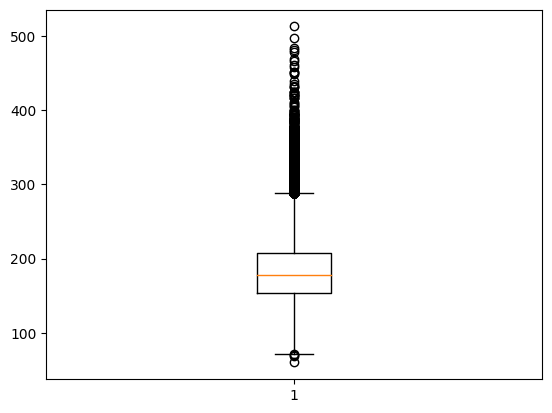

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([len_sen])

In [ ]:
print('max : ',max(len_sen))
print('min : ',min(len_sen))
print('mean: ',np.mean(len_sen))

max :  513
min :  60
mean:  181.99914567627704


In [ ]:
data.to_csv("/content/pytorch-transformer/data/test.csv", mode='a', header=False)

# Model train

## Train Setting

In [ ]:
import pandas as pd
a = pd.read_csv('/content/drive/MyDrive/pytorch-transformer-main/data/train_12.csv')
a.head()

,0,1
0,The comparators 1235 and 1237 may be expressed...,"비교기(1235 및 1237)는 설정에 따라 Relu 활성함수로 나타낼 수 있으며,..."
1,The server 320 may input a source image to the...,"서버(320)는 분석 모델 DB(325)에 소스 영상을 입력하고, 학습 모델에서 출..."
2,The step of determining the rotation may inclu...,상기 회전을 결정하는 단계는 상기 얼굴 이미지에 포함된 눈의 모양에 기초하여 상기 ...
3,The block shape and the split shape may be dif...,"블록 형태 및 분할 형태는 픽처 또는 슬라이스마다 상이하게 결정되거나, 각각의 최대..."
4,The user device 204 may detect body movement t...,"사용자 장치(204)는 사용자 장치(204)의 카메라, 다른 이미지 캡처 장치 또는..."


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.2 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/pytorch-transformer-main
!python3 "train_translation.py"

/content/drive/MyDrive/pytorch-transformer-main
Load Data | file path: ./data/train_free_2.csv
Load Complete | file path: ./data/train_free_2.csv
100% 80001/80001 [01:40<00:00, 794.81it/s]
Epoch-39 Iterator: |          | 32002/? [00:01<00:00, 20423.32it/s] 
-----------------------------------------------------------------------------------------
| end of epoch  39 | time: 132.48s | valid loss  2.53 | valid ppl    12.60
-----------------------------------------------------------------------------------------
Epoch-40 Iterator: 100% 16001/16001 [27:12<00:00,  9.80it/s, | epoch  40 | 16000/16001 batches | lr 0.07 | ms/batch 63.27 | loss  0.16 | ppl     1.17]
-----------------------------------------------------------------------------------------
| end of epoch  40 | time: 1763.97s | valid loss  2.54 | valid ppl    12.71
-----------------------------------------------------------------------------------------
Epoch-41 Iterator: 100% 16001/16001 [27:12<00:00,  9.80it/s, | epoch  41 | 16000

In [ ]:
%cd /content/drive/MyDrive/pytorch-transformer-main
!python3 "run_translation.py"

/content/drive/MyDrive/pytorch-transformer-main
Traceback (most recent call last):
  File "/content/drive/MyDrive/pytorch-transformer-main/run_translation.py", line 37, in <module>
    checkpoint = torch.load(f'{checkpoint_path}/{model_name}.pth', map_location=device)
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 797, in load
    with _open_zipfile_reader(opened_file) as opened_zipfile:
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 283, in __init__
    super().__init__(torch._C.PyTorchFileReader(name_or_buffer))
RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory
